In [2]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt 
%matplotlib inline

# make random data

In [3]:
def make_centers(samples,center,std):
    X,Y=make_blobs(n_samples=samples, centers=center, n_features=2,cluster_std=std,
               random_state=0)
    scaler = StandardScaler().fit(X)
    X=scaler.transform(X)
    return X , Y

In [4]:
X,Y=make_centers(1500,[[6,10],[-4,2],[3,-5],[2,1]],0.9)

# DBSCAN

In [5]:
epsilon=0.2
minimumSamples=7
db_clustering= DBSCAN(eps=epsilon, min_samples=minimumSamples)
db_clustering=db_clustering.fit(X)
db_label=db_clustering.labels_
print(db_label)

[0 1 2 ... 3 0 3]


Core Points: The core_mask array identifies core points (True for core points, False for non-core points). These core points play a significant role in defining clusters.

Noise Points: The points labeled as -1 are considered noise points and don't belong to any cluster.

In [6]:
core_mask=np.zeros_like(db_label,dtype=bool)
core_mask[db_clustering.core_sample_indices_]= True
core_mask

array([ True,  True,  True, ...,  True,  True,  True])

number of cluster

In [7]:
n_cluster=(len(set(db_label)))-(1 if -1 in set(db_label) else 0)
n_cluster

4

In [8]:
uniqe_labels=set(db_label)
uniqe_labels

{-1, 0, 1, 2, 3}

# visualize

In [9]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(uniqe_labels)))

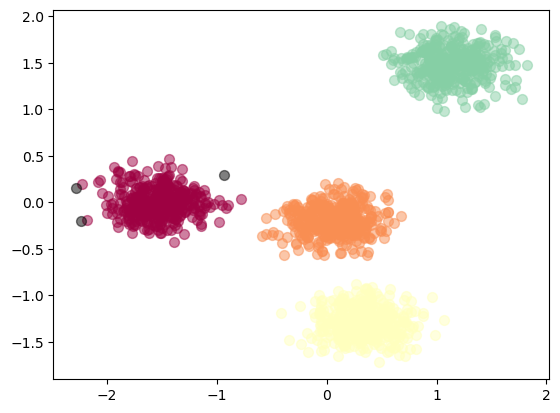

In [10]:
for k, col in zip(uniqe_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (db_label == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

# Metrics

In [12]:
# Silhouette Score: Measures how similar a sample is to its own cluster compared to other clusters
score = silhouette_score(X, db_label)
print(f'Silhouette Score: {score}')  # A higher score indicates better clustering quality

# Calinski-Harabasz Score: Measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion
ch_score = calinski_harabasz_score(X, db_label)
print(f'Calinski-Harabasz Score: {ch_score}')  # Higher values indicate better clustering

# Davies-Bouldin Score: Measures the average similarity ratio of each cluster with the cluster that is most similar to it
db_score = davies_bouldin_score(X, db_label)
print(f'Davies-Bouldin Score: {db_score}')  # Lower values indicate better clustering

Silhouette Score: 0.6806144409957142
Calinski-Harabasz Score: 8701.45644047476
Davies-Bouldin Score: 1.410074768607108
